## UPISATI IME I PREZIME!
# 1. LABORATORIJSKA VJEŽBA - FREKVENCIJSKI SPEKTAR SIGNALA
---
Cilj ove laboratorijske vježbe je upoznavanje s karakteristikama EMI prijamnika (ili analizatora spektra) i mjerenje frekvencijskog spektra signala. Pri tome će se poseban naglasak staviti na upoznavanje sa sljedećim cjelinama,
- Frekvencijski spektar osnovnih signala
- Osnovni parametri EMI prijamnika i generatora signala
- Karakteristike različitih tipova detektora
- Mjerenje spektra kontinuiranog i rafalnog (engl. _burst_) signala
- Usporedba analitičkog proračuna i mjerenja

# PRIPREMA
---
1. Proučiti princip rada EMI prijamnika i upoznati se različitim tipovima detektora i načinima prikaza
2. Izračunati spektar signala sinusnog valnog oblika frekvencije $f=10\;\rm{MHz}$ i amplitude $100\;\rm{mV_{pp}}$. Spektar nacrtati u logaritamskom mjerilu na x-osi u opsegu $[1,100]\;\rm{MHz}$, a y-os prikazati u dBuV.
3. Izračunati spektar signala trapeznog valnog oblika osnovne frekvencije $f=10\;\rm{MHz}$ i amplitude $100\;\rm{mV_{pp}}$. Vrijeme porasta i pada iznosi $t_r=t_f=2,9\;\rm{ns}$, a radni ciklus $50\%$. Spektar nacrtati u logaritamskom mjerilu na x-osi u opsegu $[1,100]\;\rm{MHz}$, a y-os prikazati u dBuV.

## Frekvencijski spektar - Sinusni signal
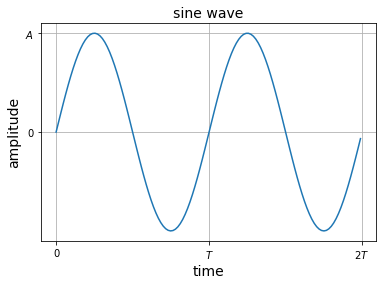

Spektar sinusnog signala sadrži samo komponentu osnovnog harmonika $c[1]=A$. Srednja vrijednost sinusnog signala prikazanog slikom jednaka je 0, pa je time $c[0]=0$. Da bi točno usporedili analitički proračun s mjerenjem, potrebno izračunati efektivnu vrijednost tako da amplitudu podijelimo s $\sqrt{2}$.

In [1]:
def sine_spectra(A,T,unit):
    # calculation of spectra components
    c=[0 for i in range(2)]
    f=[0 for i in range(2)]
    f[0] = 0
    c[0] = 0     
    f[1] = 1/T
    c[1] = A 
    
    # RMS output of spectral components
    for n in range(len(c)):
        c[n] = c[n]/np.sqrt(2)
    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        c[1] = 20*np.log10(c[1]/1e-3)      
        return c,f
    elif (unit == '[dBuV]'):
        c[1] = 20*np.log10(c[1]/1e-6)    
        return c,f


## Frekvencijski spektar - Trapezni signal
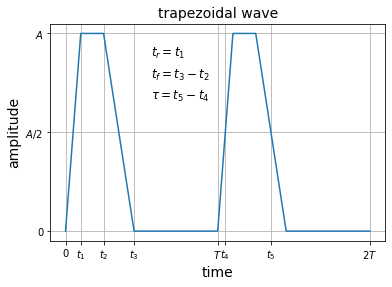

Komponente spektra uz $t_r=t_f$ računaju se prema sljedećim formulama (Paul 2006):

\begin{equation*}
c[0] = \frac{A\tau}{T}
\end{equation*}


\begin{equation*}
c[n] = \frac{2A\tau}{T}\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right | \left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |,
\end{equation*}
gdje $c[0]$ predstavlja amplitudu DC komponente, $c[1]$ amplitudu osnovne frekvencije, a npr. $c[4]$ predstavlja amplitudu 4. harmonika frekvencijskog spektra. Ovojnica spektra trapeznog signala računa se prema formuli
\begin{equation*}
20\log(envelope)=20\log(\frac{2A\tau}{T}) + 20\log(\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right |) + 20\log(\left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |)
\end{equation*}
Ovojnica spektra trapeznog signala ima dvije karakteristične frekvencije. Nakon prve karakteristične frekvencije $f_1=1/\pi \tau$, spektar opada s $-$20 dB/dek, a nakon druge karakteristične frekvencije $f_2=1/\pi t_r$ spektar opada s $-$40 dB/dek. 

In [2]:
def trap_spectra(A,T,tau,tr,unit):
    # calculation of 100 spectra components
    noC = 100
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = A*(tau/T)
        else:
            sinx_x1 = np.sin((n)*np.pi*tau/T)/((n)*np.pi*tau/T)
            sinx_x2 = np.sin((n)*np.pi*tr/T)/((n)*np.pi*tr/T)
            c[n] = 2*A*(tau/T)*np.abs(sinx_x1)*np.abs(sinx_x2)

    # RMS output of spectral components
    for n in range(len(c)):
        c[n] = c[n]/np.sqrt(2)            
            
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f

def envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tau)
    temp1 = np.linspace(fmin, 1/(np.pi*tau), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 2*A*tau/T) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tau) to 1/(pi*tr)
    temp1 = np.linspace(1/(np.pi*tau), 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*20)
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # RMS output of envelope
    for n in range(len(envelope)):
        envelope[n] = envelope[n]/np.sqrt(2)     
    
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)

Spektar jednakokračnog trokutnog signala dobije se kao poseban slučaj trapeznog, tj. kada je $\tau=t_r=t_f$. Ovojnica spektra jednakokračnog trokutnog signala ima samo jednu karakterističnu frekvenciju $f_1=1/\pi t_r$ nakon koje spektar opada s $-$40 dB/dek. 

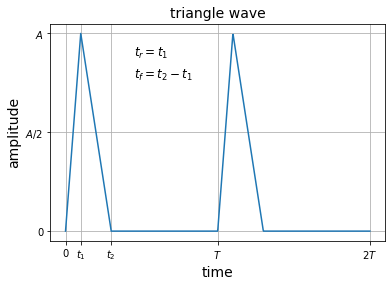

In [3]:
def isotriangle_spectra(A,T,tr,unit):
    # calculation of 100 spectra components
    noC = 100
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = 0.5*A
        else:
            nom1 = np.sin((n)*np.pi*tr/T)
            den1 = (n)*np.pi*tr/T
            c[n] = 2*A*(tr/T)*np.abs(nom1/den1)**2                 
    
    # RMS output of spectral components
    for n in range(len(c)):
        c[n] = c[n]/np.sqrt(2)
            
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f
    
def envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tr)
    temp1 = np.linspace(fmin, 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        nom1 = np.sin(np.pi*tr/T)
        den1 = np.pi*tr/T
        c = 2*A*(tr/T)*np.abs(nom1/den1)**2
        temp2 = np.append(temp2, c) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # RMS output of envelope
    for n in range(len(envelope)):
        envelope[n] = envelope[n]/np.sqrt(2)     
    
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)   
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx) 

## EMI prijamnik

U ovoj vježbi će se EMI prijamnik koristiti u _Spectrum Mode_ radi veće fleksibilnosti podešenja parametara. Zbog navedene fleksibilnosti EMI prijamnik u _Spectrum Mode_ često se koristi pri izvođenju _precompliance_ mjerenja.<br>
<code><b>MODE</b>->Spectrum</code>
![rohdes_esr3.jpg](rohdes_esr3.jpg)

EMI prijamnici odnosno analizatori spektra baziraju rad na superheterodinskom principu. Nekad je cijeli uređaj bio izveden u analognoj domeni. Danas sve više koriste EMI prijamnici bazirani na uzorkovanju IF (engl. _intermediate frequency_) signala dobivenog miješanjem ulaznog signala i signala lokalnog oscilatora. U tom slučaju filtri i različiti detektori implementiraju se u digitalnoj domeni. Takvi uređaji su brži od klasičnih analizatora spektra.
![superheterodyne2.PNG](superheterodyne2.PNG)


### RBW (Resolution Bandwidth)
<code><b>BW</b>->Res BW Manual-></code> <br>
RBW ili IF filter je pojasnopropusni filter kojim filtriramo IF signal nakon miješala (engl. _mixer_). Što je pojas RBW filtra uži to je frekvencijska rezolucija veća i time omogućava mjerenje signala koji sadrže frekvencije koje su blizu jedna drugoj. Međutim, uži frekvencijski pojas RBW filtra rezultira dužim mjerenjima. Kod mjerenja kontinuiranih signala treba paziti da širina pojasa RBW filtera bude veća od raspona mjerenih frekvencija $f_{SPAN}$ podijeljenim s brojem točaka prikaza na ekranu $N$, tj. $RBW>f_{SPAN}/(N-1)$. Ukoliko navedena nejednakost nije zadovoljena može se dogoditi da za određeni tip detektora prikazana amplituda na pojedinim frekvencijama bude manja od stvarne ili da čak uopće ne bude prikazana.

### VBW (Video Bandwidth)
<code><b>BW</b>->Video BW Manual-></code> <br>
VBW filter je niskopropusni filter u vremenskoj domeni koji se primijenjuje na izmjerenim podacima prije njihovog prikaza na ekranu. Glavna uloga VBW filtra je smanjenje šuma prikazanog spektra i time omgogućava isticanje spektralnih komponenti signala koje su maskirane šumom.

### Detektori
<code><b>TRACE</b>->Trace 1->Detector Man-></code> <br>
#### Peak Detector
Brz detektor često se korsiti za brza mjerenja kojima potvrđujemo očekivane rezultate. Ako mjerenje dobiveno s ovim detektorom zadovoljava granice postavljenje standardom tada se ne trebaju raditi dugtrajna mjerenja s _quasipeak_ ili _average_ detektorom. Ovaj detektor se naziva i detektor ovojnice (engl. _envelope detector_) jer uslijed malih vremenskih konstanti izlaz ovog detektora prati ovojnicu signala.
![peak.PNG](peak.PNG)
#### Average Detector
Srednja vrijednost svih uzoraka prikupljenih u vremenu unutar kojega se provodi mjerenje na zadanoj frekvenciji, tj. u jednoj točki. Izlaz je manji od izlaza vršnog (engl. _peak_) detektora. 
![avg.PNG](avg.PNG)
#### RMS Detector
Efektivna (RMS) vrijednost svih uzoraka prikupljenih u vremenu unutar kojega se provodi mjerenje na zadanoj frekvenciji, tj. u jednoj točki. VBW filter je premošten.

Vrijeme mjerenja za _Average_ i _RMS_ detektor određuje se u ovisnosti o mjerenom signalu:
- za nemodulirane signale najkraće vrijeme mjerenja moguće
- za modulirane signal vrijeme mjerenja je određeno najnižom frekvencijom modulacije
- za impulse se vrijeme mjerenja postavlja dovoljno dugo da se minimalno 10 impulsa dogodi u zadanom vremenu

#### Sample Detector
Trenutna vrijednost uzorka na zadanoj frekvenciji. 
#### Quasipeak Detector
Karakteristike _quasipeak_ detektora (QP) kao što su npr. vremenske konstante nabijanja i izbijanja, definirane su prema standardu CISPR16-1-1. Ovaj tip detektora uzima u obzir frekvenciju ponavljanja smetnje. Vrijednost RBW filtra je automatski odabrana i rezultira jako dugačkim mjerenjima. Granice za maksimalne vođene i zračene smetnje najčešće su definirane za mjerenja ovim detektorom.

#### CISPR Average Detector
Karakteristike CISPR _average_ detektora (AVG) definairane su prema standardu CISPR 16-1-1. Vrijednost RBW filtra je automatski odabrana i rezultira jako dugačkim mjerenjima. Obično su granice dozvoljenih smetnji za mjerenje ovim tipom detektora niže od granice za QP detektor jer se kontinuirana smetnja smatra gorom pojavom od isprekidane smetnje. Granice za maksimalne vođene i zračene smetnje najčešće su definirane za mjerenja ovim detektorom.

Na sljedećoj slici prikazani su odzivi _peak_, _average_ i _quasipeak_ detektora za različite signale.

![detector_response.PNG](detector_response.PNG)


### Vrijeme prolaska (engl. _Sweep Time_)
<code><b>SWEEP</b>->Sweep Points-></code><br>
Vrijeme koliko se dugo spektralna komponenta nalazi u propusnom području RBW filtra jednako je $t=RBW\cdot T_S/f_{SPAN}$, gdje je $T_S$ vrijeme prolaska i $f_{SPAN}$ je raspon mjerenih frekvencija. To vrijeme treba biti veće ili jednako vremenu porasta RBW filtera $k/RBW$, odnosno <br>

$\frac{RBW\cdot T_S}{f_{SPAN}}>\frac{k}{RBW}\rightarrow T_S > \frac{k\cdot f_{SPAN}}{RBW^2}$

Iz navedene jednadžbe vidljivo je da je vrijeme prolaska $T_S$ obrtnuto proporcionalno s kvadratom širine pojasa RBW filtera. Ukoliko je vrijeme prolaska prekratko, doći će do neispravnog prikaza spektra signala.
![TS.png](TS.png)

### Način prikaza (engl. _Trace Mode_)
<code><b>TRACE</b>->Trace 1-></code> <br>
#### Clear Write
Prikaz je prebrisan nakon svakog novog prolaska (engl. _sweep_).
#### Max Hold
Maksimalna vrijednost je zadržana od svih izvršenih prolazaka. Koristan način kada se mjeri frekvencijski spektar moduliranih signala ili impulsa. 
#### Min Hold
Minimalna vrijednost je zadržana od svih izvršenih prolazaka. Koristan način da se istakne konstantni signal (engl. _CW-continous wave_) unutar šuma, smetnje ili moduliranog signala.
#### View
Prikaz je dohvaćen iz memorije i zamrznut.
#### Blank
Sakriva odabrani prikaz.

## Generator signala
Generator signala koji se u ovom labosu koristi prikazan je slikom.
![keysight.png](keysight.png)
- Pritiskom na tipku <code><b>WAVEFORMS</b></code> bira se tip signala. U ovoj vježbi korist će se <code>Sine</code> i <code>Pulse</code> <br>
- Pritiskom na tipku <code><b>PARAMETERS</b></code> za odabrani tip signala podešavaju se parametri.
- Pritiskom na tipku <code><b>1</b></code> ili <code><b>2</b></code> koje se nalaze iznad BNC konektora ulazi se u izbornik za pojedini kanal. U tom izborniku uključuje se odabrani kanal <code>Ouptut->On</code> i može se postaviti impedancija tereta na iznos $50~\;\Omega$ <code>Ouptut Load->Set To 50</code> ili na iznos visoke impedancije <code>Ouptut Load->Set To High Z</code> 



# RAD U LABORATORIJU
---
<b>VAŽNO!</b> Prije početka rada s instrumentom potrebno je staviti uzemljenu narukvicu. Provjerite je li narukvica ispravno spojena na uzemljenje. Provjerite je li podloga na radnom stolu uzemljena.


1. Na generatoru signala podesiti sinusni valni oblik signala s sljedećim parametrima: $f = 10\;\rm{MHz},\;100\; \rm{mV_{pp}}$. Impedanciju tereta postaviti na iznos $50~\;\Omega$.
2. Podesiti sljedeće parametre EMI prijamnika
><code> <b>MODE</b>->Spectrum</code> <br> 
><code> <b>FREQ</b>->Start->9 MHz</code> <br>
><code> <b>FREQ</b>->Stop->11 MHz</code> <br>
><code> <b>AMPT</b>->Unit->dBuV</code> <br>
><code> <b>AMPT</b>->Ref Level->106 dBuV</code> <br>
><code> <b>AMPT</b>->RF Atten Manual->40 dB</code> <br>
><code> <b>SWEEP</b>->Sweep Points->8001</code> <br>
><code> <b>INPUT/OUTPUT</b>->Input AC</code> <br>
3. Spojiti izlaz generatora na EMI prijamnik. Uključiti izlaz generatora
><code> <b>RUN CONT</b></code> <br>
4. Postaviti RBW na 9 kHz i VBW na 100 kHz
><code> <b>BW</b>->Res BW Manual->9 kHz</code> <br>
><code> <b>BW</b>->Video BW Manual->100 kHz</code> <br>
5. Postaviti način prikaza na _Clear/Write_ i _quasipeak_ detektor
><code> <b>TRACE</b>->Trace 1->Clear/Write</code> <br>
><code> <b>TRACE</b>->Trace 1->Detector Man->QuasiPeak</code> <br>
><code> <b>TRACE</b>->Trace 2->Clear/Write</code> <br>
><code> <b>TRACE</b>->Trace 2->Detector Man->CISPR AVERAGE</code> <br>
6. Izmjeriti i pohraniti mjerenje na USB memoriju
><code> <b>TRACE</b>->Trace 1</code> <br>
><code> <b>SAVE/RCL</b>->Export->ASCII Trace Export Trace (1)</code> <br>
><code> <b>TRACE</b>->Trace 2</code> <br>
><code> <b>SAVE/RCL</b>->Export->ASCII Trace Export Trace (2)</code> <br>
9. Prikazati mjerenja i usporediti ih sa analitičkim izračunom

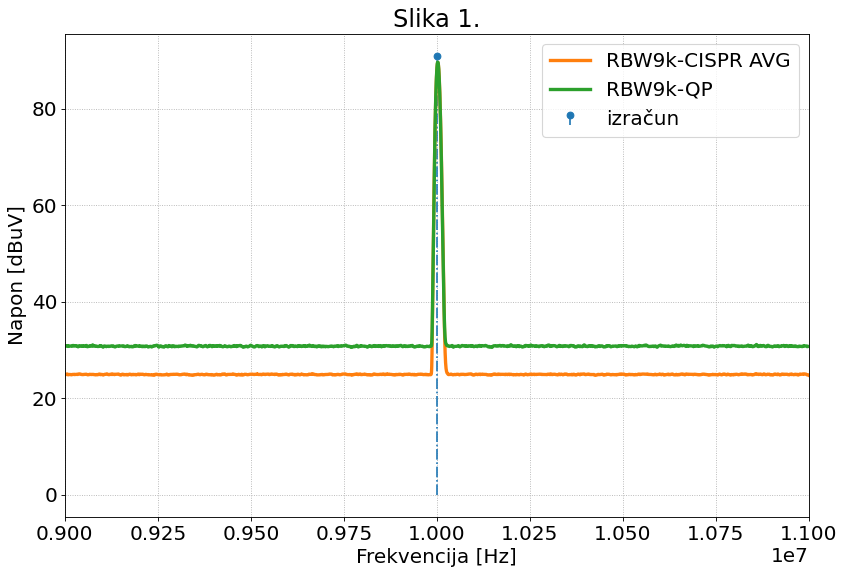

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# UPISATI VRIJEDNOSTI ZA ANALITIČKI IZRAČUN
f = 10e6 # frekvencija sinusnog signala
T = 1/f
A = 0.05 # amplituda sinusnog signala 
unit = '[dBuV]'
fmin = 9e6
fmax = 11e6

# UPISATI IMENA DATOTEKA KOJE STE POHRANILI. DATOTEKE SMJESTITE U ISTI DIREKTORIJ GDJE SE NALAZI OVA SKRIPTA
filename1 = 'avg_rbw9k.DAT' # CISPR AVERAGE MJERENJE
filename2 = 'qp_rbw9k.DAT' # QUASIPEAK MJERENJE
label1 = 'RBW9k-CISPR AVG'
label2 = 'RBW9k-QP'
 
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca()                       
axes.set_xscale("linear")
axes.set_yscale("linear") 
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [Hz]')    
plt.title('Slika 1.')
plt.ylabel('Napon '+unit)
plt.xlim(left = fmin, right = fmax)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# analitički izračun
c,f1 = sine_spectra(A,T,unit)          
markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='izračun',use_line_collection=True, basefmt=" ")

# mjerenje
data = pd.read_csv(filename1, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label1, color=cycle[1], linewidth=3) 

data = pd.read_csv(filename2, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label2, color=cycle[2], linewidth=3) 

leg = axes.legend()

10. Odgovara li amplituda dobivena u [dBuV], amplitudi podešenoj na generatoru signala? Koja je razlika u spektru dobivenim _avearage_ i _quasipeak_ detektorom?
<br>
<br>
<br>
<br>

11. Postaviti RBW na 120 kHz i VBW na 1 MHz
><code> <b>BW</b>->Res BW Manual->120 kHz</code> <br>
><code> <b>BW</b>->Video BW Manual->1 MHz</code> <br>
12. Izmjeriti frekvencijski spektar s _quasipeak_ i _CISPR AVERAGE_ detektorom, pohraniti mjerenja i usporediti ih s analitičkim izračunom

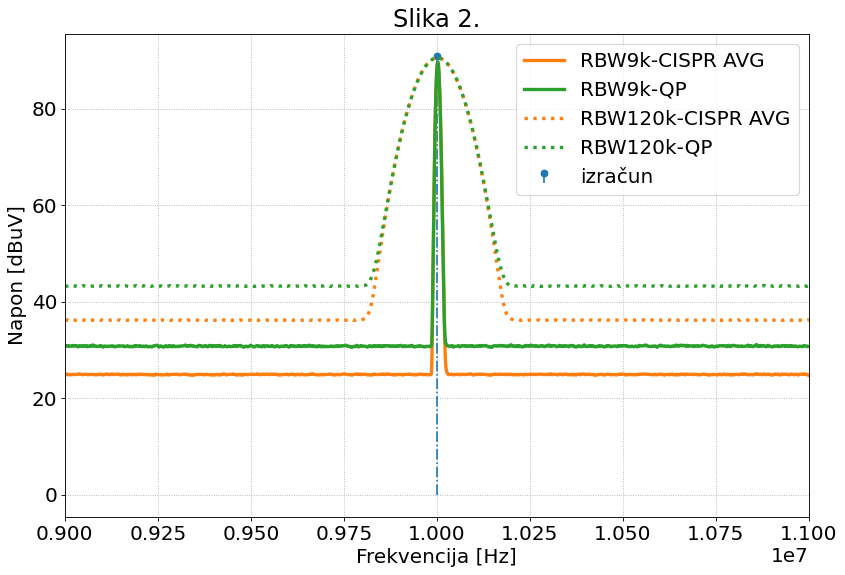

In [5]:
# UPISATI VRIJEDNOSTI ZA ANALITIČKI IZRAČUN
f = 10e6 # frekvencija sinusnog signala
T = 1/f
A = 0.05 # amplituda sinusnog signala 
unit = '[dBuV]'
fmin = 9e6
fmax = 11e6

# UPISATI IMENA DATOTEKA KOJE STE POHRANILI. DATOTEKE SMJESTITE U ISTI DIREKTORIJ GDJE SE NALAZI OVA SKRIPTA
filename3 = 'avg_rbw120k.DAT' # CISPR AVERAGE MJERENJE
filename4 = 'qp_rbw120k.DAT' # QUASIPEAK MJERENJE
label3 = 'RBW120k-CISPR AVG'
label4 = 'RBW120k-QP'

fig2 = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca()                       
axes.set_xscale("linear")
axes.set_yscale("linear") 
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [Hz]')    
plt.title('Slika 2.')
plt.ylabel('Napon '+unit)
plt.xlim(left = fmin, right = fmax)

# analitički izračun
c,f1 = sine_spectra(A,T,unit)          
markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='izračun',use_line_collection=True, basefmt=" ")

# mjerenje
data = pd.read_csv(filename1, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label1, color=cycle[1], linewidth=3) 

data = pd.read_csv(filename2, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label2, color=cycle[2], linewidth=3) 

data = pd.read_csv(filename3, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle=':',label=label3, color=cycle[1], linewidth=3) 

data = pd.read_csv(filename4, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle=':',label=label4, color=cycle[2], linewidth=3) 

leg = axes.legend()

13. U čemu se razlikuju dobivena mjerenja na slici 2. i zašto? 
<br>
<br>
<br>
<br>

14. Na generatoru signala podesiti za korišteni kanal rafalni rad (engl. _burst_) s periodom 1 ms i s brojem perioda 1000
><code> <b>BURST</b>->Burst Period->1ms</code> <br>
><code> <b>BURST</b>-># of Cycles->1000</code> <br>
><code> <b>BURST</b>->On</code> <br>
15. Izmjeriti frekvencijski spektar s _quasipeak_ i _CISPR AVERAGE_ detektorom, pohraniti mjerenja i usporediti ih s analitičkim izračunom

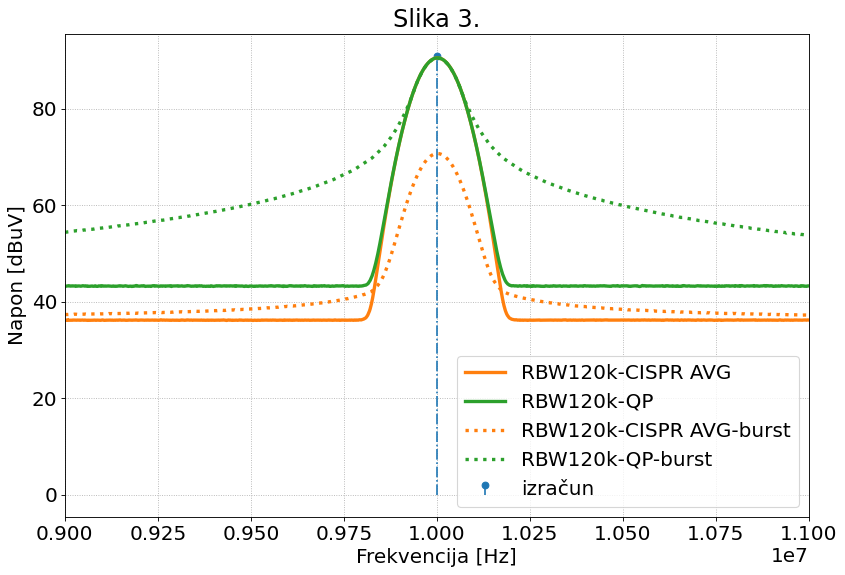

In [6]:
# UPISATI VRIJEDNOSTI ZA ANALITIČKI IZRAČUN
f = 10e6 # frekvencija sinusnog signala
T = 1/f
A = 0.05 # rms amplituda sinusnog signala 
unit = '[dBuV]'
fmin = 9e6
fmax = 11e6

# UPISATI IMENA DATOTEKA KOJE STE POHRANILI. DATOTEKE SMJESTITE U ISTI DIREKTORIJ GDJE SE NALAZI OVA SKRIPTA
filename5 = 'avg_rbw120k_burst.DAT' # CISPR AVERAGE MJERENJE
filename6 = 'qp_rbw120k_burst.DAT' # QUASIPEAK MJERENJE
label5 = 'RBW120k-CISPR AVG-burst'
label6 = 'RBW120k-QP-burst'

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca()                       
axes.set_xscale("linear")
axes.set_yscale("linear") 
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [Hz]')    
plt.title('Slika 3.')
plt.ylabel('Napon '+unit)
plt.xlim(left = fmin, right = fmax)

# analitički izračun
c,f1 = sine_spectra(A,T,unit)          
markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='izračun',use_line_collection=True, basefmt=" ")

# mjerenje
data = pd.read_csv(filename3, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label3, color=cycle[1], linewidth=3) 

data = pd.read_csv(filename4, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label4, color=cycle[2], linewidth=3) 

data = pd.read_csv(filename5, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle=':',label=label5, color=cycle[1], linewidth=3) 

data = pd.read_csv(filename6, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle=':',label=label6, color=cycle[2], linewidth=3) 

leg = axes.legend()

16. U čemu se razlikuju dobivena mjerenja na slici 3. i zašto?
<br>
<br>
<br>
<br>

17. Na generatoru signala isključiti rafalni način i podesiti pravokutni valni oblik signala s sljedećim parametrima: $f = 10\;\rm{MHz},A=\;100\; \rm{mV_{pp}},t_r=t_f=2,9\;\rm{ns},\tau=50\;\rm{ns}$. Impedanciju tereta postaviti na iznos $50~\;\Omega$.
><code> <b>WAVEFORM</b>->Pulse-></code> <br>
18. Podesiti sljedeće parametre EMI prijamnika
><code> <b>FREQ</b>->Stop->200 MHz</code> <br>
><code> <b>SPAN</b>->Freq Axis->Log</code> <br>
><code> <b>BW</b>->Res BW Auto</code> <br>
><code> <b>BW</b>->Video BW Auto</code> <br>
><code> <b>AMPT</b>->->RF Atten Auto</code> <br>
><code> <b>SWEEP</b>->Sweeptime Auto</code> <br>
19. Izmjeriti frekvencijski spektar s _Auto Peak_ detektorom, pohraniti mjerenje i usporediti s analitičkim izračunom
><code> <b>TRACE</b>->Trace 1->Clear/Write</code> <br>
><code> <b>TRACE</b>->Trace 1->Detector Man->QuasiPeak</code> <br>
><code> <b>TRACE</b>->Trace 2->Blank</code> <br>
><code> <b>SAVE/RCL</b>->Export->ASCII Trace Export Trace (1)</code> <br>

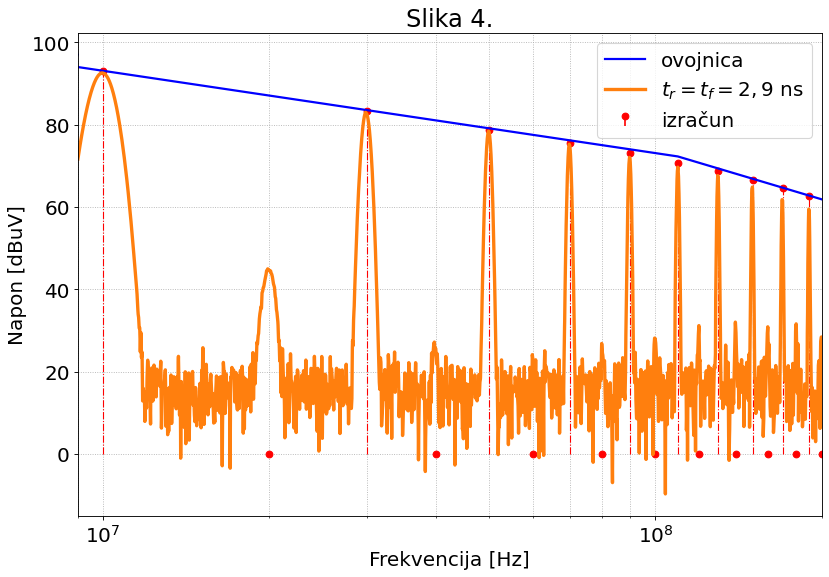

In [7]:
# UPISATI VRIJEDNOSTI ZA ANALITIČKI IZRAČUN
f = 10e6 # frekvencija pravokutnog signala
T = 1/f
A = 0.1 # amplituda pravokutnog signala
tr = 2.9e-9 # vrijeme porasta
tau = 50e-9 # trajanje poluperiode
unit = '[dBuV]'
fmin = 9e6
fmax = 200e6

# UPISATI IMENA DATOTEKA KOJE STE POHRANILI. DATOTEKE SMJESTITE U ISTI DIREKTORIJ GDJE SE NALAZI OVA SKRIPTA
filename7 = 'ap_rbwauto_square_t2n9.DAT'
label7 = '$t_r=t_f=2,9$ ns'

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca()                       
axes.set_xscale("log")
axes.set_yscale("linear") 
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [Hz]')    
plt.title('Slika 4.')
plt.ylabel('Napon '+unit)
plt.xlim(left = fmin, right = fmax)

# analitički izračun
c,f1 = trap_spectra(A,T,tau,tr,unit)          
envelope,f2 = envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax)        
markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='izračun',use_line_collection=True)
axes.plot(f2, envelope, lw=2, color='blue',label='ovojnica')     

plt.setp(baseline, color='r', linewidth=0)
plt.setp(stemlines, color='r', linewidth=1)
plt.setp(markerline, color='r', linewidth=2) 

# mjerenje
data = pd.read_csv(filename7, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label7, color=cycle[1], linewidth=3) 

leg=axes.legend(loc='upper right')

20. Na generatoru signala povećati vrijeme porasta/pada $t_r=t_f=10;\rm{ns}$.

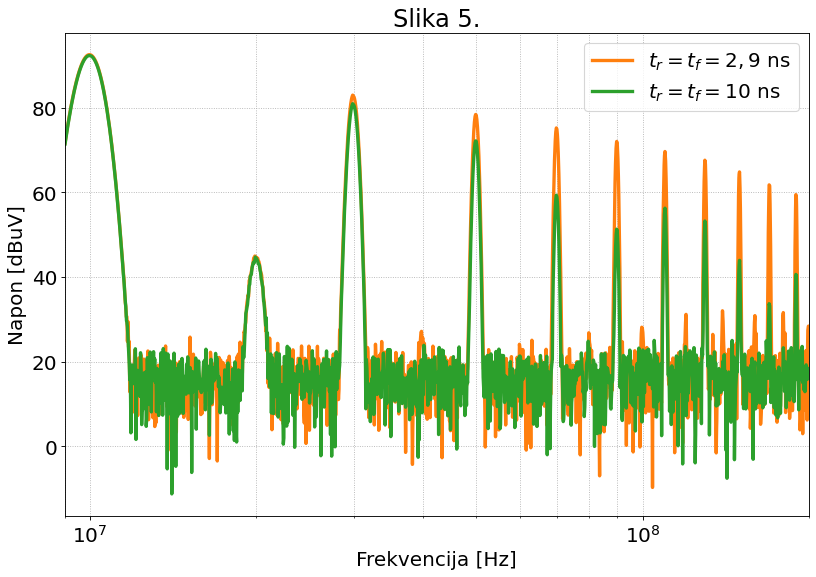

In [9]:
# UPISATI VRIJEDNOSTI ZA ANALITIČKI IZRAČUN
f = 10e6 # frekvencija pravokutnog signala
T = 1/f
A = 0.1 # amplituda pravokutnog signala
tr = 10e-9 # vrijeme porasta
tau = 50e-9 # trajanje poluperiode
unit = '[dBuV]'
fmin = 9e6
fmax = 200e6

# UPISATI IMENA DATOTEKA KOJE STE POHRANILI. DATOTEKE SMJESTITE U ISTI DIREKTORIJ GDJE SE NALAZI OVA SKRIPTA
filename8 = 'ap_rbwauto_square_t10n.DAT'
label8 = '$t_r=t_f=10$ ns'

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca()                       
axes.set_xscale("log")
axes.set_yscale("linear") 
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [Hz]')    
plt.title('Slika 5.')
plt.ylabel('Napon '+unit)
plt.xlim(left = fmin, right = fmax)



# mjerenje
data = pd.read_csv(filename7, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label7, color=cycle[1], linewidth=3) 

data = pd.read_csv(filename8, delimiter=';',skiprows=29,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x = data['freq'].drop([0]).astype('float')
y = data['dB'].drop([0]).astype('float')
axes.plot(x,y, linestyle='-',label=label8, color=cycle[2], linewidth=3) 

leg=axes.legend(loc='upper right')

21. Komentirajte razlike u izmjerenim spektirma prikazanima na slici 5. Što bi se dogodilo s parnim harmonicima kada $\tau \neq T/2$?
<br>
<br>
<br>
<br>